In [102]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import math
import os

In [103]:
train = pd.read_csv(r"C:\Users\Pratiksha\Desktop\train.csv")
test = pd.read_csv(r"C:\Users\Pratiksha\Desktop\test.csv")

len(train)

4209

corr = train.corr()
f, ax = plt.subplots(figsize=(13, 11))
sns.heatmap(corr, annot=True, fmt=".2f")

## unique values and type

In [104]:
unique_values = pd.DataFrame(train.columns, columns=["Column"])
unique_values["Type"] = unique_values["Column"].apply(lambda x: train[x].dtype)
unique_values["UniqueValues"] = unique_values["Column"].apply(lambda x: train[x].nunique())

temp = pd.DataFrame(np.sum(train.isnull()), columns=['NULL'])
unique_values = pd.merge(unique_values, temp, left_on='Column', right_index=True)
unique_values

,Column,Type,UniqueValues,NULL
0,ID,int64,4209,0
1,X0,object,47,0
2,X1,object,27,0
3,X2,object,44,0
4,X3,object,7,0
5,X4,object,4,0
6,X5,object,29,0
7,X6,object,12,0
8,X8,object,25,0
9,X10,int64,2,0


In [105]:
unique_values = pd.DataFrame(test.columns, columns=["Column"])
unique_values["Type"] = unique_values["Column"].apply(lambda x: test[x].dtype)
unique_values["UniqueValues"] = unique_values["Column"].apply(lambda x: test[x].nunique())

temp = pd.DataFrame(np.sum(test.isnull()), columns=['NULL'])
unique_values = pd.merge(unique_values, temp, left_on='Column', right_index=True)
unique_values

,Column,Type,UniqueValues,NULL
0,ID,int64,4209,0
1,X0,object,49,0
2,X1,object,27,0
3,X2,object,45,0
4,X3,object,7,0
5,X4,object,4,0
6,X5,object,32,0
7,X6,object,12,0
8,X8,object,25,0
9,X10,int64,2,0


# Label Encoder

In [106]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i, col in enumerate(train.columns):
    if(train[col].dtype == 'object'): 
        train[col] = le.fit_transform(train[col])
        print('done')
        

done
done
done
done
done
done
done
done


In [107]:
testing = test.drop(['y'], axis=1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i, col in enumerate(testing.columns):
    if(testing[col].dtype == 'object'): 
        testing[col] = le.fit_transform(testing[col])
        print('done')

done
done
done
done
done
done
done
done


In [108]:
testing.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,21,23,34,5,3,26,0,22,0,...,0,0,0,1,0,0,0,0,0,0
1,2,42,3,8,0,3,9,6,24,0,...,0,0,1,0,0,0,0,0,0,0
2,3,21,23,17,5,3,0,9,9,0,...,0,0,0,1,0,0,0,0,0,0
3,4,21,13,34,5,3,31,11,13,0,...,0,0,0,1,0,0,0,0,0,0
4,5,45,20,17,2,3,30,8,12,0,...,1,0,0,0,0,0,0,0,0,0


# Data engineering

# Data preparation for model

In [109]:
## dropping some variables on which prediction shouldnt depend and target  variables

training = train.drop(labels = ['ID', 'y'], axis = 1)
target = train['y']
testing = testing.drop(labels = ['ID'], axis = 1)
testing.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,21,23,34,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,42,3,8,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,21,23,17,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,21,13,34,5,3,31,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,20,17,2,3,30,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0


In [110]:
from sklearn.decomposition import PCA
pca= PCA()
pca.fit(training)
pca.transform(training)
pca.transform(testing)


array([[ 1.51225966e+01,  1.24263438e+01,  1.65756877e+01, ...,
         1.38288539e-16,  4.18926725e-17,  7.89526584e-17],
       [-1.64185227e+01, -6.08780452e+00, -5.81810847e+00, ...,
        -2.25101101e-16,  1.12373949e-16, -8.05358039e-17],
       [ 1.13108897e+01, -2.24098735e+00, -5.68320971e+00, ...,
         3.58172829e-17, -3.31480554e-19, -2.47171670e-17],
       ...,
       [-1.34676639e+01,  3.52415451e+00, -3.87634464e-01, ...,
         2.70808004e-18, -3.96260302e-18, -1.31461000e-18],
       [ 2.40869249e+01, -6.51220120e+00, -6.38950949e+00, ...,
        -1.60034825e-18,  3.64529699e-18,  5.60516267e-19],
       [-1.65579418e+01, -5.49565202e+00, -1.37038912e+01, ...,
        -1.67773811e-19,  2.24297290e-18, -1.25067589e-18]])

In [111]:
## splitting train and test data 

#Xtrain, Xtest, ytrain, ytest = train_test_split( training, target,
                                                random_state = 100, test_size= .2)
#xtrain = xtrain.reset_index(drop = True)
#xval = xval.reset_index(drop = True)
#ytrain = ytrain.reset_index(drop = True)
#yval = yval.reset_index(drop = True)
#testing = testing.reset_index(drop=True)

IndentationError: unexpected indent (<ipython-input-111-460295650984>, line 4)

# LightGBM

In [12]:
!pip install lightgbm

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [112]:
##ensemble of lightgbm which different seeding and 


from lightgbm import LGBMRegressor

lgb1 = LGBMRegressor(n_estimators = 600,
                     booster = 'dart',
    metric= 'rmse',
    num_leaves= 50,
    learning_rate  = 0.15,
    sub_sample = 0.9,
    colsample_bytree = 0.8,
    reg_lambda=0.025,
    reg_alpha = 0.022,
    seed = 100,
    objective= 'regression')

lgb2 = LGBMRegressor(n_estimators = 120,
                     booster = 'dart',
    metric= 'rmse',
    num_leaves= 50,
    learning_rate  = 0.05,
    sub_sample = 0.95,
    colsample_bytree = 0.85,
    reg_lambda=0.025,
    reg_alpha = 0.022,
    seed = 200,
    objective= 'regression')



lgb3 = LGBMRegressor(n_estimators = 100, 
                     booster = 'dart',
    metric= 'rmse',
    num_leaves= 40,
    learning_rate  = 0.1,
    sub_sample = 0.85,
    colsample_bytree = 0.8,
    reg_lambda=0.025,
    reg_alpha = 0.022,
    seed = 500,
    objective= 'regression')

lgb4 = LGBMRegressor(n_estimators = 150,
                     booster = 'dart',
    metric= 'rmse',
    num_leaves= 30,
    learning_rate  = 0.1,
    sub_sample = 0.95,
    colsample_bytree = 0.75,
    reg_lambda=0.025,
    reg_alpha = 0.022,
    seed = 600,
    objective= 'regression')







In [113]:
lgb1.fit(training, target, eval_set = [(training, target)], eval_metric = 'rmse', verbose = True )
lgb2.fit(training, target, eval_set = [(training, target)], eval_metric = 'rmse', verbose = True )
lgb3.fit(training, target, eval_set = [(training, target)], eval_metric = 'rmse', verbose = True )
lgb4.fit(training, target, eval_set = [(training, target)], eval_metric = 'rmse', verbose = True )



[1]	training's rmse: 11.5855
[2]	training's rmse: 10.7165
[3]	training's rmse: 10.0307
[4]	training's rmse: 9.48904
[5]	training's rmse: 9.06326
[6]	training's rmse: 8.73616
[7]	training's rmse: 8.47277
[8]	training's rmse: 8.27053
[9]	training's rmse: 8.11213
[10]	training's rmse: 7.96635
[11]	training's rmse: 7.85138
[12]	training's rmse: 7.76181
[13]	training's rmse: 7.69379
[14]	training's rmse: 7.62926
[15]	training's rmse: 7.57008
[16]	training's rmse: 7.51957
[17]	training's rmse: 7.48114
[18]	training's rmse: 7.44037
[19]	training's rmse: 7.38899
[20]	training's rmse: 7.34655
[21]	training's rmse: 7.30953
[22]	training's rmse: 7.27338
[23]	training's rmse: 7.23281
[24]	training's rmse: 7.19578
[25]	training's rmse: 7.16551
[26]	training's rmse: 7.12655
[27]	training's rmse: 7.08545
[28]	training's rmse: 7.05314
[29]	training's rmse: 7.01601
[30]	training's rmse: 6.97821
[31]	training's rmse: 6.94164
[32]	training's rmse: 6.9044
[33]	training's rmse: 6.87461
[34]	training's rmse

[362]	training's rmse: 3.35365
[363]	training's rmse: 3.35101
[364]	training's rmse: 3.34655
[365]	training's rmse: 3.34261
[366]	training's rmse: 3.33947
[367]	training's rmse: 3.3364
[368]	training's rmse: 3.33158
[369]	training's rmse: 3.32791
[370]	training's rmse: 3.32488
[371]	training's rmse: 3.32052
[372]	training's rmse: 3.31682
[373]	training's rmse: 3.31302
[374]	training's rmse: 3.3091
[375]	training's rmse: 3.30475
[376]	training's rmse: 3.30265
[377]	training's rmse: 3.29833
[378]	training's rmse: 3.29468
[379]	training's rmse: 3.29175
[380]	training's rmse: 3.2878
[381]	training's rmse: 3.2852
[382]	training's rmse: 3.28282
[383]	training's rmse: 3.27827
[384]	training's rmse: 3.2754
[385]	training's rmse: 3.27015
[386]	training's rmse: 3.26622
[387]	training's rmse: 3.26491
[388]	training's rmse: 3.25967
[389]	training's rmse: 3.25724
[390]	training's rmse: 3.25509
[391]	training's rmse: 3.25306
[392]	training's rmse: 3.2504
[393]	training's rmse: 3.24789
[394]	training

[81]	training's rmse: 7.08704
[82]	training's rmse: 7.07263
[83]	training's rmse: 7.05978
[84]	training's rmse: 7.04328
[85]	training's rmse: 7.03029
[86]	training's rmse: 7.01582
[87]	training's rmse: 7.00084
[88]	training's rmse: 6.99075
[89]	training's rmse: 6.97273
[90]	training's rmse: 6.95918
[91]	training's rmse: 6.9443
[92]	training's rmse: 6.93157
[93]	training's rmse: 6.92128
[94]	training's rmse: 6.90608
[95]	training's rmse: 6.89575
[96]	training's rmse: 6.88335
[97]	training's rmse: 6.87089
[98]	training's rmse: 6.85731
[99]	training's rmse: 6.84625
[100]	training's rmse: 6.83058
[101]	training's rmse: 6.81994
[102]	training's rmse: 6.80485
[103]	training's rmse: 6.79489
[104]	training's rmse: 6.78358
[105]	training's rmse: 6.77241
[106]	training's rmse: 6.76109
[107]	training's rmse: 6.74928
[108]	training's rmse: 6.7348
[109]	training's rmse: 6.71865
[110]	training's rmse: 6.70815
[111]	training's rmse: 6.69705
[112]	training's rmse: 6.68504
[113]	training's rmse: 6.6776

LGBMRegressor(booster='dart', boosting_type='gbdt', class_weight=None,
       colsample_bytree=0.75, importance_type='split', learning_rate=0.1,
       max_depth=-1, metric='rmse', min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=150,
       n_jobs=-1, num_leaves=30, objective='regression', random_state=None,
       reg_alpha=0.022, reg_lambda=0.025, seed=600, silent=True,
       sub_sample=0.95, subsample=1.0, subsample_for_bin=200000,
       subsample_freq=0)

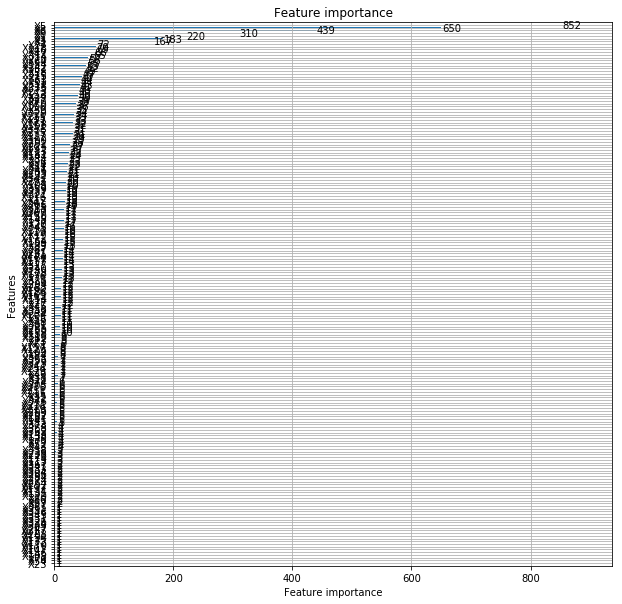

In [114]:
##feature importance plot

import lightgbm
ax = lightgbm.plot_importance(lgb2)
fig = ax.figure
fig.set_size_inches(10, 10)

In [115]:
##predictions for test dataset

predictions = (lgb1.predict(testing)+ lgb2.predict(testing)+ lgb3.predict(testing)+ lgb4.predict(testing))/4
test['predicted'] = pd.DataFrame(predictions)
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X377,X378,X379,X380,X382,X383,X384,X385,y,predicted
0,1,az,v,n,f,d,t,a,w,0,...,0,1,0,0,0,0,0,0,NaN,76.877749
1,2,t,b,ai,a,d,b,g,y,0,...,1,0,0,0,0,0,0,0,NaN,94.009712
2,3,az,v,as,f,d,a,j,j,0,...,0,1,0,0,0,0,0,0,NaN,78.059547
3,4,az,l,n,f,d,z,l,n,0,...,0,1,0,0,0,0,0,0,NaN,75.690510
4,5,w,s,as,c,d,y,i,m,0,...,0,0,0,0,0,0,0,0,NaN,112.065518


In [116]:
test.y.fillna(test.predicted, inplace = True)

In [117]:

test = test.drop(labels = ['predicted'], axis = 1)
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X376,X377,X378,X379,X380,X382,X383,X384,X385,y
0,1,az,v,n,f,d,t,a,w,0,...,0,0,1,0,0,0,0,0,0,76.877749
1,2,t,b,ai,a,d,b,g,y,0,...,0,1,0,0,0,0,0,0,0,94.009712
2,3,az,v,as,f,d,a,j,j,0,...,0,0,1,0,0,0,0,0,0,78.059547
3,4,az,l,n,f,d,z,l,n,0,...,0,0,1,0,0,0,0,0,0,75.690510
4,5,w,s,as,c,d,y,i,m,0,...,0,0,0,0,0,0,0,0,0,112.065518


In [119]:
test.to_csv('pratiksha_iitr_15111029.csv', index = False)